
#Personal project in Python 
##Find english words in the human proteome
---
Guétemme Colin
---

From a .txt file containing 3000 english words we want to find this words in a file containing the human proteome.





# Import the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import io
import os

##Import the dataset

Require to have the data (which are in the github) on a local disk

In [0]:
print("Select the file for the words (english-words.txt)")
English_words = files.upload()
print("Select the file for the proteome (human-proteome.fasta)")
Proteome = files.upload()

#Formatting data:
The variable `wfr` (words file read) will be transform into a list, each element corresponding to a word.

The variable `pfr` (proteome file read) will first be transform as a list where each element is a line of the file, then the lines wich are not corresponding to proteine sequences are removed. Then all is join in one long string and put in lower case to be compared with the english words. 


In [4]:
# Creates a list with all the words in the file english-words.txt
wf = open("english-words.txt", "r")
wfr = wf.read()
wfr = wfr.split()

wfr[500:510]  # Exemple of the words between 500 and 510

['colonial',
 'color',
 'column',
 'combination',
 'combine',
 'come',
 'comedy',
 'comfort',
 'comfortable',
 'command']

In [0]:
# I decide to concatenate all the sequence in one long sequence
# which means the order of the sequence count since append a 
# a sequence to another can create a new word.
pf = open("human-proteome.fasta", "r")
pfr = pf.read()
pfr = pfr.split("\n") 

# Then checks for each line if it start with a ">" 
# meaning this line a sequence, if it is the case 
# delete this line.
counter=0

# I use a while loop because the length of 'pfr' change when I delete an element
while len(pfr)-1 > counter: 
    if pfr[counter][0] == '>': 
        del pfr[counter]
        # In this case we do not increment 'counter'
        # because since we delete element pfr[counter], 
        # pfr[counter] is a different element
    else :
        counter += 1 # Increment 'counter' for the while loop

# Merge all the sequences together
pfr = ''.join(pfr[0:len(pfr)]) 

# Then, I put the new long sequence in lower case to compare it to the english words (also in lower case)
pfr = pfr.lower() 

# Histogram of the number of letter
this cell find the distribution of words with "n" letters

!! LONG TIME TO PROCESS !! (for all the dictionary)

I have only looked at the words between 4 and 11 letters (to avoid the very high frequency of 1, 2 and 3 letters words).


In [32]:
# Initialisation of the vector for the number of occurences
# of each word with 'n' letters
Nb_letter=[0, 0, 0, 0, 0, 0, 0, 0]  # from 4 to 11

# Min and max index of the dictionnary to run the algorithm
# the minimum being 0 and the maximum being 2999
min_value = 100
max_value = 200

# Initalisation of a list to store the positions
# of the words in the genome ('n_letter'>3)
list_word = []
counter = 0

for i in range(min_value, max_value): 
    word = wfr[i]
    list_pos = []
    # To clear the status of the number of words scan
    clear_output()
    # How many words the computer scanned
    print("{0} over {1}".format(i+1-min_value,max_value-min_value)) 

    # check that the word contain more then 3 letters
    if len(word) > 3:  
        # The last part of the range is to avoid to
        # that the end of the word we are looking at
        # go out of the proteome list
        for position in range(0, len(pfr)-len(word)):
            if pfr[position : position+len(word)] == word:
                # Increment the index of Nb_letter corresponding to the size of the word
                Nb_letter[len(word)-4] += 1
                list_pos.append(position)

        if len(list_pos) > 0:
            # creates a new index of list_word and add
            # in this new space the current word and the 
            # the position where we can find it, if it can
            # be find in the proteome
            list_word.append([])
            list_word[counter].append(word)
            list_word[counter].append(list_pos)

            # Since all the word are not added to list_word
            # I need to create a different counter
            counter += 1

print("The vector of occurences for n letters (with n from 4 to 11) is: \n {} \n ".format(str(Nb_letter)))

# Print only the first results in case of list_word is too large 
if len(list_word) > 10:
    print("the occurences of the words are: ")
    for i in range(0, 9):
        print(list_word[i])
    print("... and more") 
else:
    print("the occurences of the words are: ")
    for i in range(0, len(list_word)):
        print(list_word[i])       

# Results for all the words
# Nb_letter = [34407, 2982, 160, 23, 5, 0, 0, 0]

100 over 100
The vector of occurences for n letters (with n from 4 to 11) is: 
 [319, 107, 17, 0, 0, 0, 0, 0] 
 
the occurences of the words are: 
['alter', [1048616, 4020330, 4085236, 5290682, 6548554, 7531842, 8534239, 9031252, 9163981, 9317214, 10608385]]
['anger', [3154077, 3666405, 4875726, 6450465, 8777855]]
['angle', [5111855, 8278295, 8358149, 10802588]]
['angry', [753570, 7288590]]
['apart', [1071010, 1088787, 1540373, 1783895, 3149557, 4042238, 5928089, 6156217, 6228400, 9297381, 9716158, 10485271]]
['appeal', [1871118, 6156367, 6471937]]
['apple', [30619, 444335, 832647, 2165457, 3373782, 3395481, 3546840, 3653603, 3697700, 3932910, 3933405, 7314753, 7839024, 8843393, 10008912, 10036323, 10059787, 10644696, 10830602, 10905323, 11307182]]
['apply', [523820, 5236621, 7207740, 9713257, 9746200, 10396351]]
['area', [14835, 37026, 66762, 140684, 202350, 256052, 342742, 372989, 381125, 418855, 452247, 530597, 612710, 621111, 656330, 733230, 752110, 756233, 778982, 832033, 898671, 

Plot of the distribution of the number of letters in each occurences of word in the proteome

(in this one all the words have been tested)

[34407, 2982, 160, 23, 5, 0, 0, 0]


Text(0, 0.5, 'Occurences in the proteome')

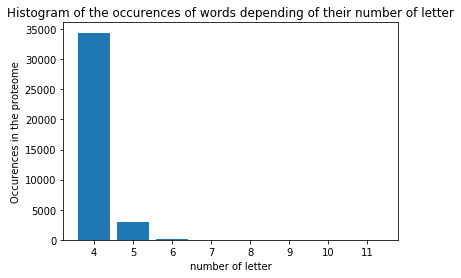

In [0]:
plt.bar([4, 5, 6, 7, 8, 9, 10, 11], Nb_letter)
plt.title('Histogram of the occurences of words depending of their number of letter')
plt.xlabel('number of letter')
plt.ylabel('Occurences in the proteome')

Plot of the number of occurences for a sample of words


Text(0, 0.5, 'Occurences in the proteome')

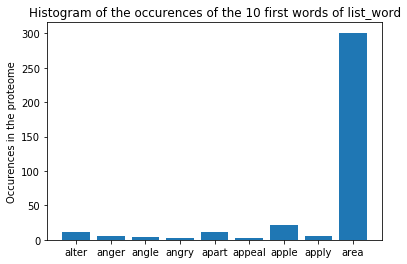

In [20]:
list_name = []
list_value = []

# Creates a list of names for the x-axis
# and a list of number of occurences for the y-axis
for i in range(0, 9):
    list_name.append(list_word[i][0])
    list_value.append(len(list_word[i][1]))

plt.bar(list_name, list_value)
plt.title('Histogram of the occurences of the 10 first words of list_word')
plt.xlabel('')
plt.ylabel('Occurences in the proteome')

# Find a specific word

This cell allow the user to find either a word of the dictionary using a word index or to enter a new string to find.

In the case of an index, it should be an integer between 0 and 2999.
 
In the case of a string it should only contain lowcase letters.

In [31]:
word = input("enter the word (string or index), you want to test: ")

# This try is necessary to check if the input can be transform into an int
# to be used as an index, otherwise it is consider as a string and do not change.
try: 
    word = int(word)
except:
    word = word

# If the input is an index, it will select the corresponding word in the dictionary
if type(word) == int:
    word_pos = word
    word = wfr[word]
    print("You selected the word: {0}, at the position {1} ".format(word, word_pos))

counter = 0
vect_pos = []

# Scan all the proteome and increment vect_pos when it find an occurence
for position in range(0, len(pfr)-len(word)):
  if pfr[position : position+len(word)] == word:
    vect_pos.append(position)
    counter += 1

# Print the number of occurence of the selected word
print("\n the number of occurences for {0} is {1}".format(word, counter))

# Only print the first values if the number of occurences is too high
if len(vect_pos) < 10:
    print("At the following positions : {0} ".format(vect_pos))
else:
    print("At the following positions : {0} ... ".format(vect_pos[0:9]))


enter the word (string or index), you want to test: rennes

 the number of occurences for rennes is 1
At the following positions : [10153391] 
